In [26]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

In [37]:
n = 8      #no. of qubits
N = 2**n   #dimension of matrix
t = 2      #no. of target states
length = list(range(n))
noi = math.floor(math.sqrt(N/t) * np.pi / 4)   #No of iterations
print("noi = ", noi)

#to set target states
target = np.zeros(t)
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of i loop
        if(count == t):
            break
print("target = ",target)

phi = [a*np.pi/180 for a in range(180,361,15)]
print("phi = ",phi)

phi_m = [a*180/np.pi for a in phi]
print("phi_m = ",phi_m)
print("len(phi) = ",len(phi))

x = [complex(np.cos(a), np.sin(a)) for a in phi]
print("x = ",x)

#array to store coherence values after each suboperation in every grover's iteration
data = np.zeros((len(phi),noi * 4))   #to store coherence values
x_axis = list(range(noi * 4))        #to store iteration number
#print(data)

noi =  8
target =  [242. 201.]
phi =  [3.141592653589793, 3.4033920413889422, 3.6651914291880923, 3.9269908169872414, 4.1887902047863905, 4.4505895925855405, 4.71238898038469, 4.97418836818384, 5.235987755982989, 5.497787143782138, 5.759586531581287, 6.021385919380437, 6.283185307179586]
phi_m =  [180.0, 195.0, 210.0, 225.0, 239.99999999999997, 255.0, 270.0, 285.00000000000006, 300.00000000000006, 315.0, 329.99999999999994, 345.0, 360.0]
len(phi) =  13
x =  [(-1+1.2246467991473532e-16j), (-0.9659258262890684-0.25881904510252035j), (-0.8660254037844386-0.5000000000000001j), (-0.7071067811865477-0.7071067811865475j), (-0.5000000000000004-0.8660254037844385j), (-0.25881904510252063-0.9659258262890683j), (-1.8369701987210297e-16-1j), (0.25881904510252113-0.9659258262890682j), (0.5000000000000001-0.8660254037844386j), (0.7071067811865474-0.7071067811865477j), (0.8660254037844384-0.5000000000000004j), (0.9659258262890683-0.2588190451025207j), (1-2.4492935982947064e-16j)]


In [38]:
def iteration(i,a):
    qc.barrier()
    count = i*4
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    data[a][count] = coherence

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)
    data[a][count+1] = coherence

    qc.append(P_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied P operator to |ψ4⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ4⟩ = ",coherence)
    data[a][count+2] = coherence

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ5⟩ = ",coherence)
    data[a][count+3] = coherence

for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi[a]*180/np.pi,"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    choice = a
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = x[choice]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            

    #defining P Operator
    P_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):    #off-diagonal elements
                P_operator.data[i][j] = 0
            else:
                if(i==0 & j==0):   #for 1st element only
                    P_operator.data[i][j] = 1
                else:
                    P_operator.data[i][j] = -1

    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION--------")
        iteration(i,a)

======================================== FOR ϕ =  180.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.813476562500001


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.813476562500001


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  247.06250000000003
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  247.06250000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  22.47137546539307


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  22.47137546539307


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  224.23443603515628
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  224.23443603515628


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  42.15577370021494


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  42.15577370021494


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  189.34702306985858
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  189.34702306985858


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  64.42534453276407


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  64.42534453276407


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  146.72711798547704
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  146.72711798547704


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  86.51813923673443


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  86.51813923673443


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  101.6605879166197
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  101.6605879166197


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  105.69413346898753


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  105.69413346898753


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  59.7367388387298
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  59.7367388387298


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  119.57505450725054


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  119.57505450725054


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  26.15511062729488
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  26.15511062729488


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  126.43934280884567


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  126.43934280884567


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  5.080612250242877
======================================== FOR ϕ =  195.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.714550065380921


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.714550065380921


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  247.24437502513453
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  247.24437502513453


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  21.851544220603866


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  21.851544220603866


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  225.72542977608663
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  225.72542977608663


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  39.955956351802264


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  39.955956351802264


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  195.03269572251165
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  195.03269572251165


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  58.871252146744084


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  58.871252146744084


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  161.64473606072616
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  161.64473606072616


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  75.37560659533668


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  75.37560659533668


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  132.76857017284703
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  132.76857017284703


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  86.81790495652608


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  86.81790495652608


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  114.95663133352609
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  114.95663133352609


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  91.54869878870812


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  91.54869878870812


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  112.52197216993102
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  112.52197216993102


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  88.96742891740017


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  88.96742891740017


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  126.0774625026358
======================================== FOR ϕ =  210.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.4226979752345885


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.4226979752345885


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  247.7731228203132
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  247.7731228203132


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  20.079884364133427


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  20.079884364133427


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  229.872495726853
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  229.872495726853


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  33.933012138369605


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  33.933012138369605


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  209.82132053903445
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  209.82132053903445


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  44.48234116222569


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  44.48234116222569


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  196.8822985054899
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  196.8822985054899


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  48.346106227036046


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  48.346106227036046


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  197.04483289047616
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  197.04483289047616


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  44.306053173185155


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  44.306053173185155


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  210.23339366667443
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  210.23339366667443


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  33.636329535346185


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  33.636329535346185


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  230.34393154952022
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  230.34393154952022


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  19.758779660267063


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  19.758779660267063


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  248.08481067766715
======================================== FOR ϕ =  225.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.952412072538021


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.952412072538021


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  248.59955035584065
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  248.59955035584065


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  17.402632951233443


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  17.402632951233443


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  235.7867982174401
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  235.7867982174401


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  25.612904016019897


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  25.612904016019897


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  228.1156814930606
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  228.1156814930606


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  26.929822792119133


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  26.929822792119133


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  232.2235474509555
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  232.2235474509555


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  20.60414904135698


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  20.60414904135698


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  244.5693316660826
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  244.5693316660826


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  10.229883615289243


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  10.229883615289243


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.24880401546858
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.24880401546858


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.5989840471488574


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.5989840471488574


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.2725210917521
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.2725210917521


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.067824369531706


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.067824369531706


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.91341234921805
======================================== FOR ϕ =  239.99999999999997 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.326893838828024


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.326893838828024


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  249.64638145667297
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  249.64638145667297


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  14.176184499839565


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  14.176184499839565


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  242.25503963040654
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  242.25503963040654


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  16.92649108524676


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  16.92649108524676


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.78100351787572
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.78100351787572


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  12.17185495043226


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  12.17185495043226


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.02721794461772
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.02721794461772


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.051805422428766


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.051805422428766


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.4809058603511
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.4809058603511


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.3063807723949874


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.3063807723949874


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.463751851934
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.463751851934


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  8.745561437373494


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  8.745561437373494


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  247.09117601514893
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  247.09117601514893


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  15.724723220358182


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  15.724723220358182


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  241.57275871318183
======================================== FOR ϕ =  255.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.576684697524294


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.576684697524294


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  250.8150578269137
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  250.8150578269137


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  10.798148895203628


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  10.798148895203628


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  248.05529718281866
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  248.05529718281866


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  9.53593295579254


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  9.53593295579254


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.85308989223913
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.85308989223913


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.310943969814222


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.310943969814222


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.40185174741978
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.40185174741978


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.486184200526723


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.486184200526723


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.34801948779491
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.34801948779491


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.810138371725359


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.810138371725359


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  249.01416637523616
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  249.01416637523616


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  11.215862063760277


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  11.215862063760277


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  249.14232372377083
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  249.14232372377083


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.630641391645894


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.630641391645894


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.44981158604773
======================================== FOR ϕ =  270.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.737861040446418


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.737861040446418


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.99482705853848
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.99482705853848


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.633209231485532


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.633209231485532


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.26371529433348
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.26371529433348


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.3329081472293245


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.3329081472293245


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.97054837718503
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.97054837718503


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.2568069330769558


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.2568069330769558


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.97052154154935
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.97052154154935


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.130895175828643


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.130895175828643


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  251.75558190862083
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.75558190862083


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.589810322780867


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.589810322780867


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.5555556448472
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.5555556448472


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.920242115054315


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.920242115054315


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.88444540172364
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.88444540172364


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5414899582200668


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5414899582200668


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.88356119978732
======================================== FOR ϕ =  285.00000000000006 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.849901200585787


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.849901200585787


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.07395453911928
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.07395453911928


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.95122469868979


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.95122469868979


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.48482070301176
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.48482070301176


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.328923945673931


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.328923945673931


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.56849218982816
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.56849218982816


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.2882573665378967


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.2882573665378967


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.88471507616077
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.88471507616077


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.230856095922799


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.230856095922799


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.49689152834242
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.49689152834242


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.9365092134917528


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.9365092134917528


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.80556900528322
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.80556900528322


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.7442689139239249


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.7442689139239249


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.799201614306
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.799201614306


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.594744410652679


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.594744410652679


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.95850546061897
======================================== FOR ϕ =  300.00000000000006 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.9533537017948808


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.9533537017948808


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.95334250385557
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.95334250385557


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.892420940187692


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.892420940187692


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9980937134837
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9980937134837


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.0624659716638948


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.0624659716638948


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99809362945874
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99809362945874


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.011878618518994


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.011878618518994


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.9565830832824
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.9565830832824


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.8291895255821133


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.8291895255821133


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99239814090927
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99239814090927


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.1267609020556823


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.1267609020556823


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99239545262017
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99239545262017


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.0678903658400727


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.0678903658400727


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.96304592767092
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.96304592767092


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.7637722539019034


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.7637722539019034


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98298612216024
======================================== FOR ϕ =  315.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.087451371364072


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.087451371364072


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.56380638853355
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.56380638853355


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.4675352849774812


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.4675352849774812


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.8318036062152
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.8318036062152


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.7633626439418625


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.7633626439418625


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.80935795233333
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.80935795233333


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.30096539879647


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.30096539879647


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.84796760995056
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.84796760995056


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.6608771314624298


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.6608771314624298


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.85994142290923
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.85994142290923


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.5609037159641186


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.5609037159641186


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.54290559426772
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.5429055942677


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  2.0284323873358447


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  2.0284323873358447


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99639132719244
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99639132719244


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.0865205473804685


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.0865205473804685


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99639051827447
======================================== FOR ϕ =  329.99999999999994 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.2878226384671523


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.2878226384671523


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.88917347173665
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.88917347173665


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5912111152033729


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5912111152033729


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.90491008949596
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.90491008949596


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.9035016553842633


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.9035016553842633


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.8253785848895
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.8253785848895


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.1159719438577158


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.1159719438577158


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.95974785587828
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.95974785587828


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.31808835222373644


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.31808835222373644


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.95875862433226
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.95875862433226


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.3404194611535787


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.3404194611535787


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.97124051033873
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.97124051033873


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.25960586608878494


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.25960586608878494


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.97162372223553
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.97162372223553


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.1542300460751125


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.1542300460751125


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.8323913838426
======================================== FOR ϕ =  345.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5844484232719122


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5844484232719122


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.99161477830165
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.99161477830165


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.13751183285006213


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.13751183285006213


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.9916891037387
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.9916891037387


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.5417654590875768


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.5417654590875768


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.97389317108076
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.97389317108076


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.27386970618715034


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.27386970618715034


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.97571308035265
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.97571308035265


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.46085573028305465


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.46085573028305465


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.96180078899658
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.96180078899658


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.3977303954341144


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.3977303954341144


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.97031119619385
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.97031119619385


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.34991481455286083


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.34991481455286083


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.96514158401337
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.96514158401337


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  0.49771022772748336


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  0.49771022772748336


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.98190555080194
======================================== FOR ϕ =  360.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.600140040167636e-15


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.600140040167636e-15


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.468646926129539e-16


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.468646926129539e-16


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.6001400401676373e-15


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.6001400401676373e-15


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.468646926129578e-16


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.468646926129578e-16


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.60014004016764e-15


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.60014004016764e-15


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.468646926129639e-16


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.468646926129639e-16


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.6001400401676444e-15


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.6001400401676444e-15


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.468646926129732e-16


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.468646926129732e-16


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003


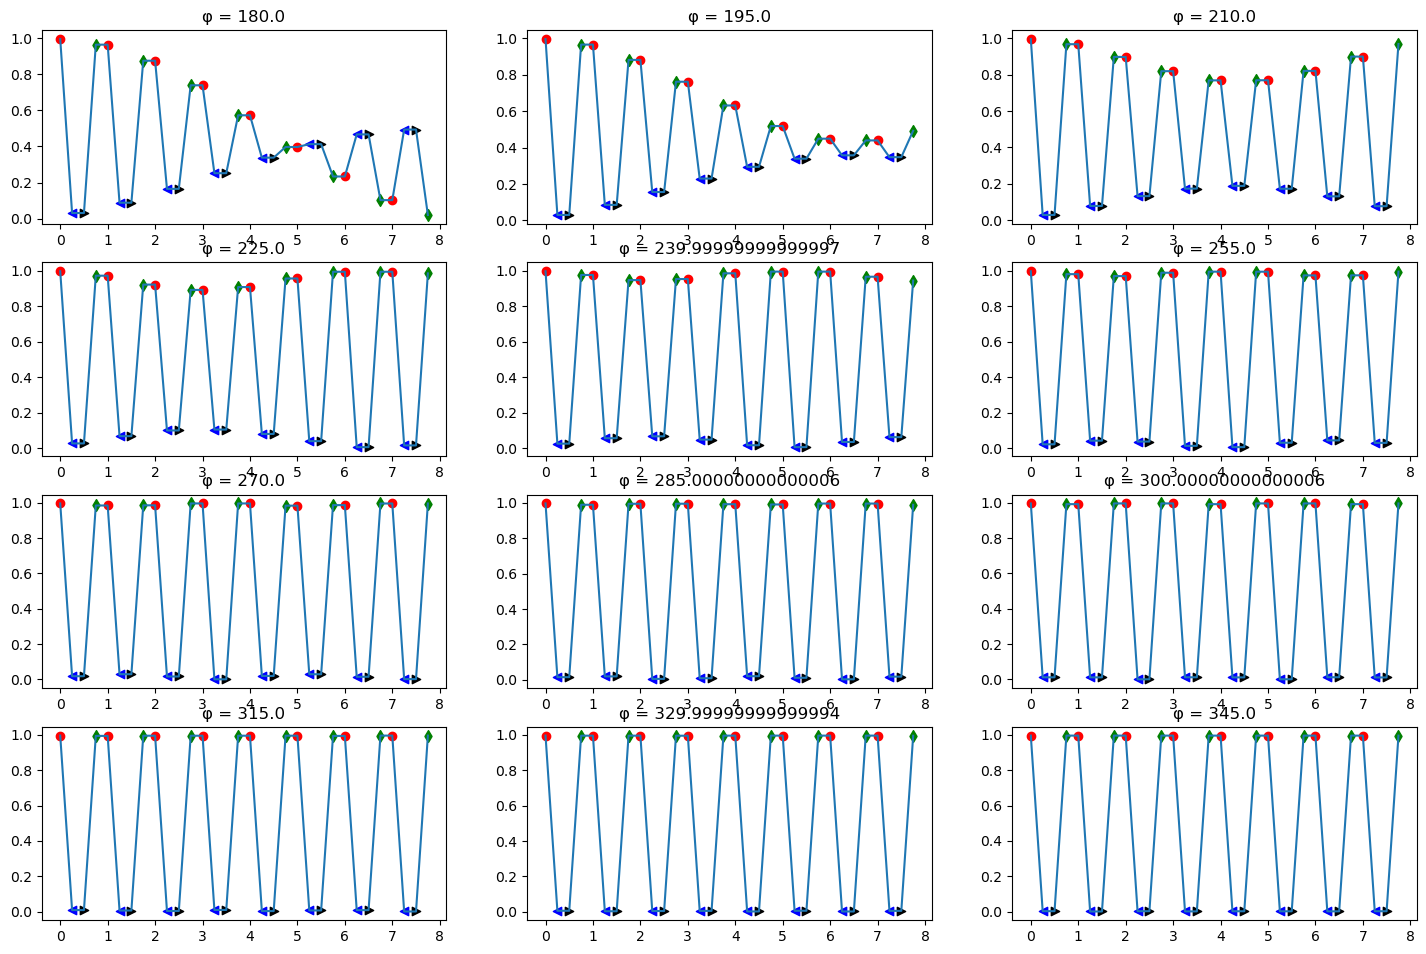

In [39]:
data_N = [a/N for a in data]
xa = [a/4 for a in x_axis]

a = len(phi)//3
b = len(phi)//a
fig, axs = pl.subplots(a,b, figsize=(10,10))
count = 0
for i in range(a):
    for j in range(b):
        axs[i,j].scatter(xa[::4], data_N[count][::4], color='red', label='O')
        axs[i,j].scatter(xa[1::4], data_N[count][1::4], color='blue', marker='<', label='H')
        axs[i,j].scatter(xa[2::4], data_N[count][2::4], color='black', marker='>', label='P')
        axs[i,j].scatter(xa[3::4], data_N[count][3::4], color='green', marker='d', label='H')
        axs[i,j].plot(xa, data_N[count])
        axs[i,j].set_title("φ = " + str(phi[count]*180/np.pi))
        count += 1
        pl.subplots_adjust(top=1, right=1.5)
pl.show()